In [3]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('C:/Users/namir/Documents/My_Documents/Coding projects/Credit Risk Prediction/Dataset/bankloans.csv')

In [5]:
df
#debtinc, Debt-to-income ratio, Measures how much income goes toward debt — key risk indicator
#creddebt, Amount of credit card debt, High credit card debt can signal poor financial management
#othdebt, Other types of debt (car loans, personal loans, etc.), Additional debt burden beyond credit cards
#default, Target variable: 1 = Defaulted on loan, 0 = Did not default

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


Analysis

In [6]:
df.shape

(1150, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [8]:
df.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [11]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

<BarContainer object of 700 artists>

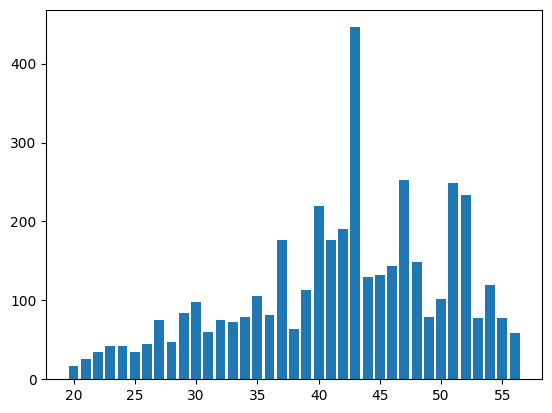

In [12]:
plt.bar(df['age'],df['income'])

<Axes: xlabel='age', ylabel='income'>

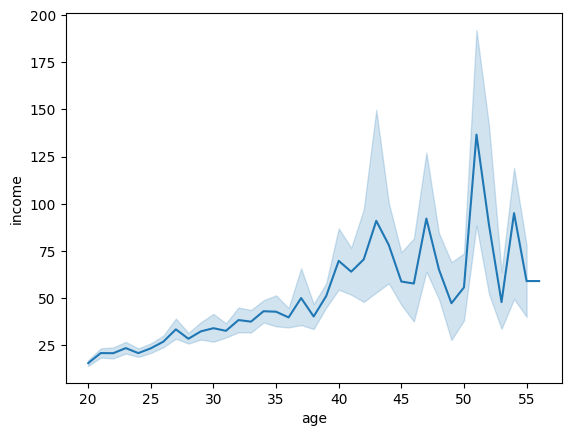

In [13]:
sns.lineplot(x = df['age'], y = df['income'])

Text(0, 0.5, 'Frequency')

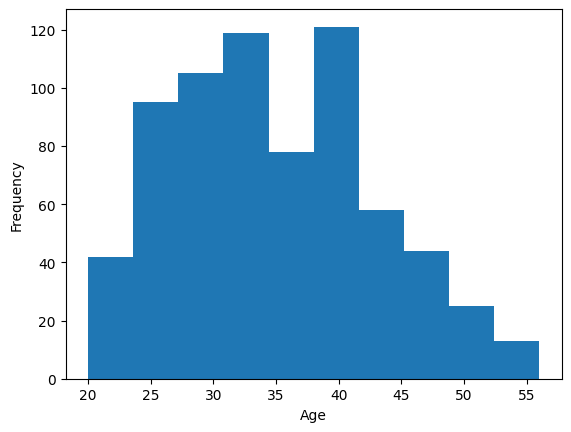

In [14]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')

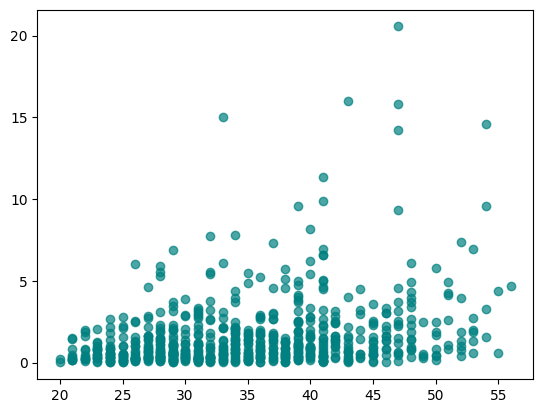

In [15]:
plt.scatter(df['age'], df['creddebt'], alpha=0.7, color='teal')

Prediction model building

In [16]:
X = df.drop(['default'],axis=1)

In [17]:
X

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938
696,29,2,6,4,21,11.5,0.369495,2.045505
697,33,1,15,3,32,7.6,0.491264,1.940736
698,45,1,19,22,77,8.4,2.302608,4.165392


In [18]:
Y= df['default']

In [19]:
Y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
lr = LogisticRegression(class_weight='balanced')

In [25]:
param_grid = [
    {
        'penalty':['l1'],
        'C' : [100,10,1.0,0.1,0.01],
        'solver':['liblinear','saga']
    },
    {
        'penalty':['l2'],
        'C' : [100,10,1.0,0.1,0.01],
        'solver':['liblinear','saga','lbfgs','newton-cg','sag']
    },
    {
        'penalty':['elasticnet'],
        'l1_ratio':[0.5],
        'C':[100,10,1.0,0.1,0.01],
        'solver':['saga']
    }
]

In [35]:
grid = GridSearchCV(estimator=lr,param_grid=param_grid,scoring='accuracy',n_jobs=-1,cv=5)

In [36]:
grid

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg',
                                     'sag']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

We know that out dataset is imbalanced or default, hence we will use SMOTE

In [37]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [38]:
smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train,Y_train)

In [39]:
grid.fit(X_train_resampled,Y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg',
                                     'sag']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [40]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [41]:
grid.best_score_*100

np.float64(77.34939759036145)

In [42]:
y_pred = grid.predict(X_test)

In [46]:
print(accuracy_score(Y_test,y_pred)*100)

83.57142857142857


In [47]:
print(confusion_matrix(Y_test,y_pred))

[[86 16]
 [ 7 31]]


In [49]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       102
         1.0       0.66      0.82      0.73        38

    accuracy                           0.84       140
   macro avg       0.79      0.83      0.81       140
weighted avg       0.85      0.84      0.84       140



In [50]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [51]:
x = grid.predict(scaler.transform([[22,12,3,6,70,2.0,0.2,0.3]])).astype('int')
if x == 0:
    print(x)
    print('Not a defaulter')
else:
    print(x)
    print('Defaulter')

[1]
Defaulter


C:\Users\namir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
x = grid.predict(scaler.transform([[22,12,8,6,100,2.0,0.2,0.3]])).astype('int')
if x == 0:
    print(x)
    print('Not a defaulter')
else:
    print(x)
    print('Defaulter')

[0]
Not a defaulter


C:\Users\namir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
with open('cred_risk_prediction_model.pkl','wb') as model_file:
    pkl.dump(grid,model_file)

with open('credit_risk_prediction_scaler','wb') as scaler_file:
    pkl.dump(scaler,scaler_file)